# Ranking Subreddits by Comments, Authors and Comment/Author Ratios

A month ago Redditor [/u/Stuck_In_the_Matrix](https://www.reddit.com/user/Stuck_In_the_Matrix) released a [huge dataset of Reddit comments](https://www.reddit.com/r/datasets/comments/3bxlg7/i_have_every_publicly_available_reddit_comment/) with more than 1.7 billion records. Redditor [/u/fhoffa](https://www.reddit.com/user/fhoffa) ([Felipe Hoffa](https://twitter.com/felipehoffa)) made this dataset [available via Google Big Query](https://www.reddit.com/r/bigquery/comments/3cej2b/17_billion_reddit_comments_loaded_on_bigquery/).

Felipe provided several query examples and also created a table of [Subreddit ranks for May 2015](https://bigquery.cloud.google.com/table/fh-bigquery:reddit_comments.subr_rank_201505). This table includes comment and author counts aggregated from more than 54 million comments posted in that month. You need a Google account with billing enabled to download this dataset.

In this notebook we'll quickly dive into this table and create a few charts ranking Subreddits by number of comments, authors and comments by authors. This particular table will also be used in [future notebooks](http://ramiro.org/notebook/rss.xml) to be able to calculate values relative to the total number of comments or authors within a Subreddit.

In [1]:
%matplotlib inline
%load_ext signature

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import helpers

# Set style and meta info.
mpl.style.use('ramiro')

chartinfo = 'Author: Ramiro Gómez - ramiro.org • Data: Reddit /u/Stuck_In_the_Matrix & /u/fhoffa - reddit.com'
infosize = 12

df = pd.read_csv('csv/reddit_comments_201505_subreddit_ranks.csv', index_col='subreddit')
df.head()

,comments,rank_comments,authors,rank_authors
subreddit,,,,
AskReddit,3883198,1,570722,1
leagueoflegends,1148203,2,119316,7
nba,704755,3,45029,22
funny,690898,4,224069,2
pics,564366,5,205298,3


##Subreddits ranked by number of comments

The first chart simply shows the number of comments by Subreddit to get an idea which Subreddits are most active in terms of comments.

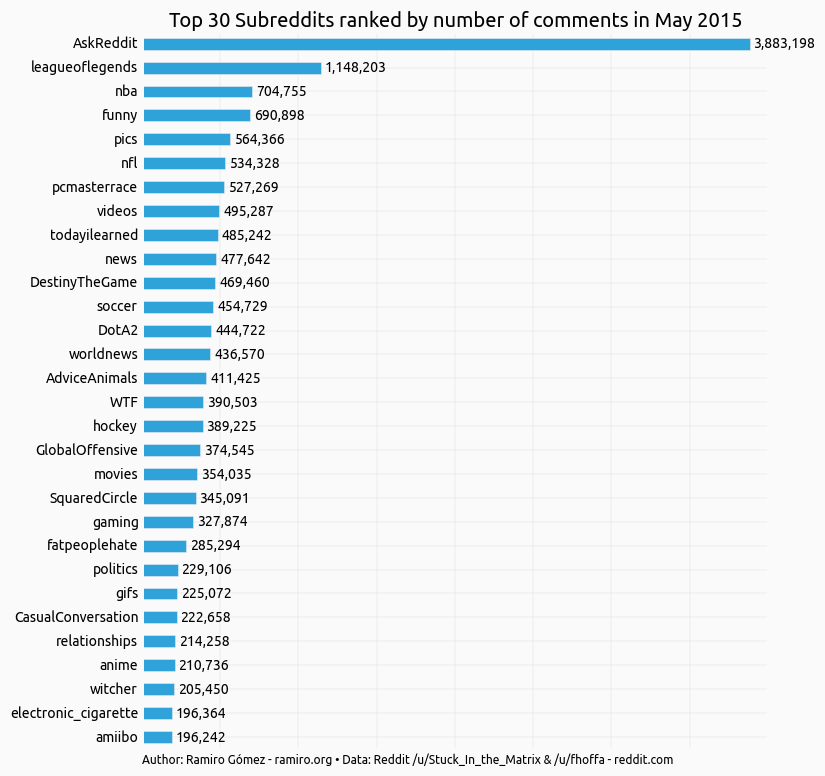

In [2]:
limit = 30
title = 'Top {} Subreddits ranked by number of comments in May 2015'.format(limit)

s = df.sort('comments', ascending=False).head(30)['comments'].order()
ax = s.plot(kind='barh', figsize=(10, 12), title=title)

ax.tick_params(labelbottom='off')
ax.yaxis.set_label_text('')
ax.annotate(chartinfo, xy=(0, -1.02), xycoords='axes fraction', fontsize=infosize)

for i, value in enumerate(s):
    label = format(int(value), ',')
    ax.annotate(label, (value + 30000, i - .14))

plt.savefig('img/' + helpers.slug(title), bbox_inches='tight')

Unsurprisingly, [/r/AskReddit](https://www.reddit.com/r/askreddit), which is also the [biggest Subreddit](http://redditmetrics.com/top) regarding the number of subscribers, had the most comments. It is a discussion oriented Subreddit that only allows self posts. The huge gap between the runners-up might not be expected though.

##Subreddits ranked by number of authors

The second chart shows the number of authors by Subreddit which is another indicator of activity and community size.

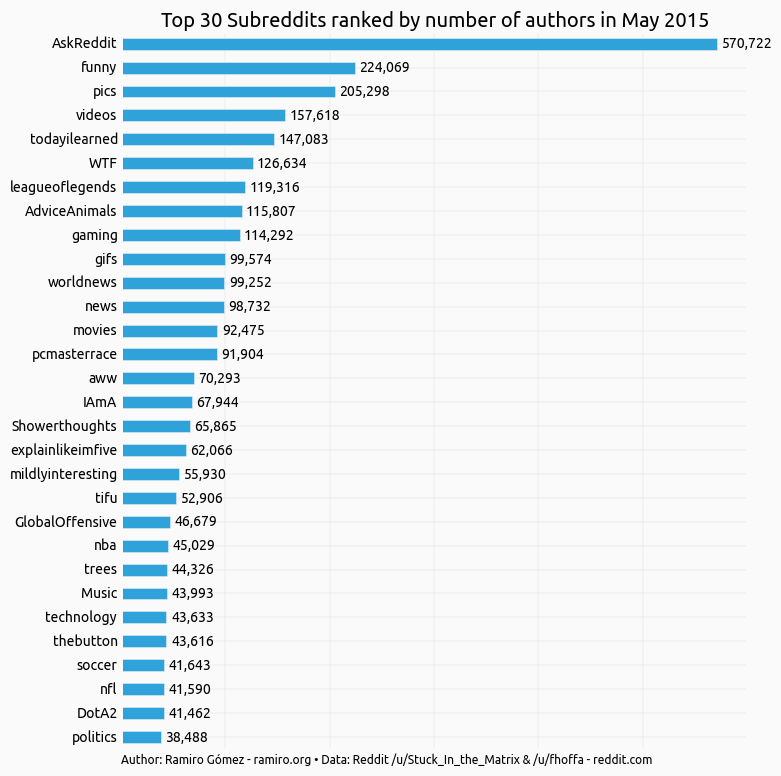

In [3]:
title = 'Top {} Subreddits ranked by number of authors in May 2015'.format(limit)

s = df.sort('authors', ascending=False).head(30)['authors'].order()
ax = s.plot(kind='barh', figsize=(10, 12), title=title)

ax.tick_params(labelbottom='off')
ax.yaxis.set_label_text('')
ax.annotate(chartinfo, xy=(0, -1.02), xycoords='axes fraction', fontsize=infosize)

for i, value in enumerate(s):
    label = format(int(value), ',')
    ax.annotate(label, (value + 5000, i - .14))

plt.savefig('img/' + helpers.slug(title), bbox_inches='tight')

AskReddit clearly "wins" again, but it is not as dominant in this ranking.

##Subreddits ranked by comment/author ratios

Finally, let's look at the Subreddits, which have the most diligent authors. To do so we add a column with the ratio of comments by author used for the ranking.

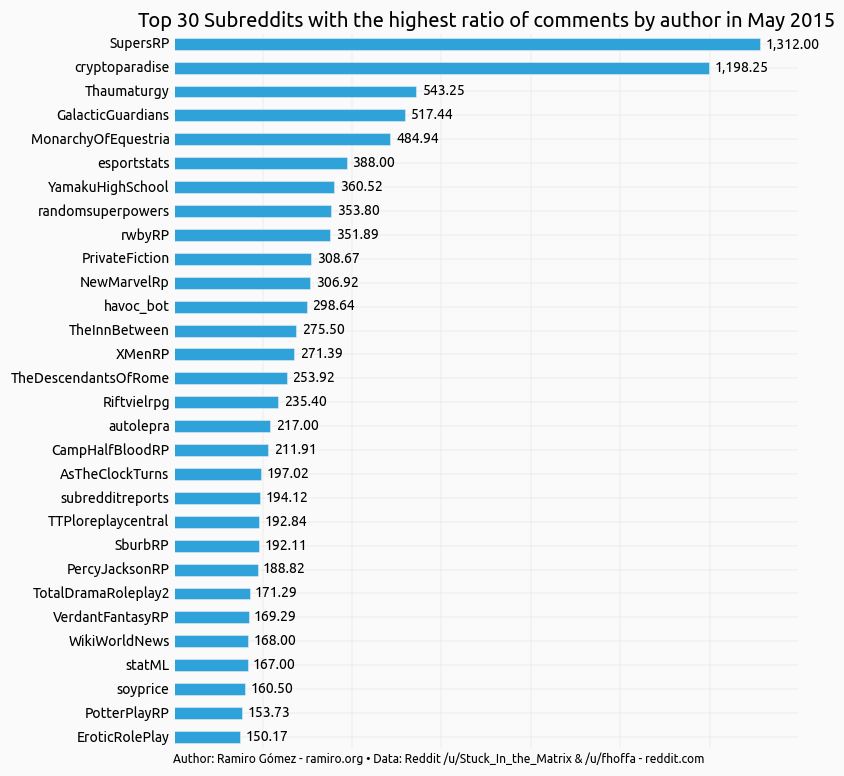

In [6]:
title = 'Top {} Subreddits with the highest ratio of comments by author in May 2015'.format(limit)

df['comment_author_ratio'] = df['comments'] / df['authors']

s = df.sort('comment_author_ratio', ascending=False).head(limit)['comment_author_ratio'].order()
ax = s.plot(kind='barh', figsize=(10, 12), title=title)

ax.tick_params(labelbottom='off')
ax.yaxis.set_label_text('')
ax.annotate(chartinfo, xy=(0, -1.02), xycoords='axes fraction', fontsize=infosize)

for i, value in enumerate(s):
    label = format(value, ',.2f')
    ax.annotate(label, (value + 15, i - .15))

plt.savefig('img/' + helpers.slug(title), bbox_inches='tight')

I don't know any of the Subreddits listed here, but looked up [SupersRP](https://www.reddit.com/r/supersrp), which *is for roleplaying as a Superhuman, wizard, alien who crash landed or whatever of your choice in a modern setting.*

##Summary 

These rankings just scratch the surface of the Reddit comments dataset. The purpose of this notebook is to get an idea of which Subreddits are most active regarding user comments, regardless of whether they were posted by humans or bots. The ranking table will be used in [follow-up notebooks](http://ramiro.org/notebook/rss.xml) as a means to calculate relative values.

In [5]:
%signature